<a href="https://colab.research.google.com/github/bvdsb01/mLearning/blob/main/KNN-IrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K Nearest Neighbor's Classification** - To which category a new point belongs to

K is decided by us by hit and trial method

Its more like - ek naya point agar diya hai toh woh kis classification/category group ka hissa hoga, toh uske liye hum dekhte hai ki woh kaunsi category ke points ke pass hai, distance dekhte hai **euclidean distance**

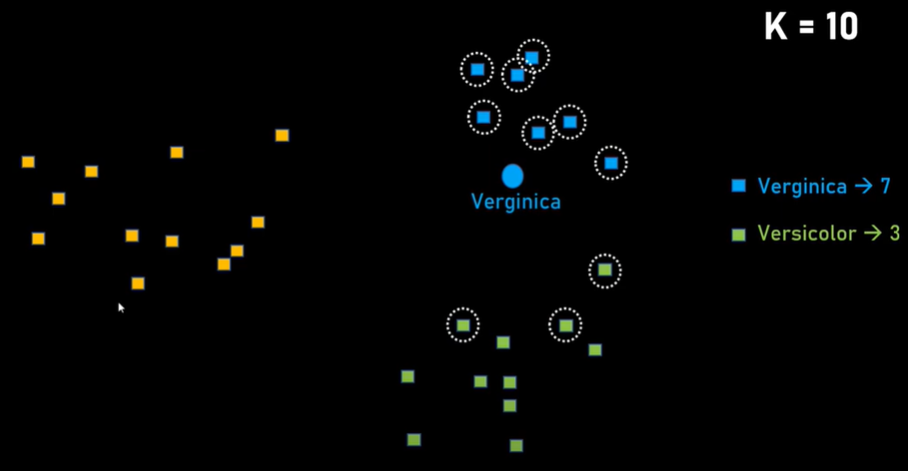

K should not be very small nor very high. KNN supports n no.of features.

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [11]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

**Sepal length vs Sepal Width (Setosa vs Versicolor)**

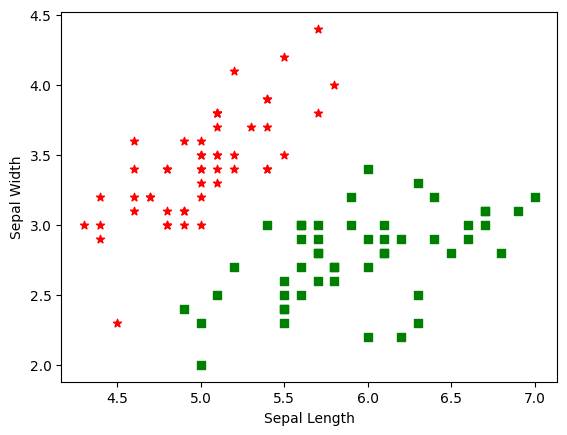

In [31]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0["sepal length (cm)"], df0['sepal width (cm)'], color = "red", marker = "*")
plt.scatter(df1["sepal length (cm)"], df1['sepal width (cm)'], color = "green", marker = "s")

**Petal Length vs Petal Width (Setosa vs Versicolor)**

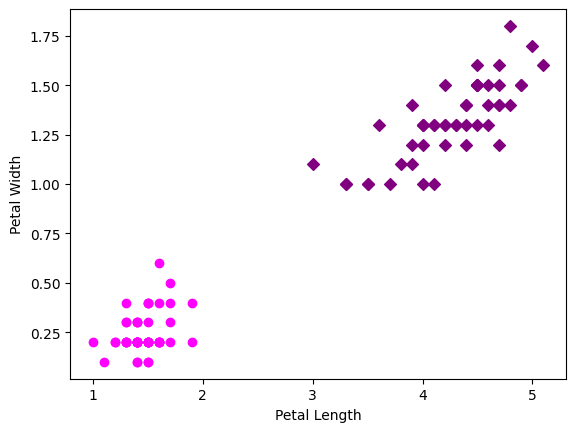

In [32]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df0["petal length (cm)"], df0['petal width (cm)'], color = "fuchsia", marker = "o")
plt.scatter(df1["petal length (cm)"], df1['petal width (cm)'], color = "purple", marker = "D")

**Train Test Split**

In [33]:
from sklearn.model_selection import train_test_split
X = df.drop(['target', 'flower_name'], axis = "columns")
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [34]:
len(X_train)

120

In [35]:
len(X_test)

30

**Create KNN (K Nearest Neighbor Classifier)**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
knn.score(X_test, y_test)

1.0